### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
## Importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
## Load data from csv file
data = pd.read_csv('data/coupons.csv')

In [4]:
## verifying the data loaded
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


Notes: Coupons data loaded into the dataframe from the csv file


2. Investigate the dataset for missing or problematic data.

In [5]:
## Get information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
## verifying columns of the dataframe
data.columns


Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [7]:
## Statistical Summary
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


**Notes:** Information gathered about the variables in the dataframe.


3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
#Search for any missing variable values
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [9]:
## Data Cleansing process
## Ignored the missing values in the column "car", as it does not have influence on decisive or dependent variable
## Droping the missing data in the remaing columns, as volumne of the missing data is low (~4%) and we have good chunk of data for the analysis
## list to drop missing values
columns_to_drop = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
## droping the missing values
data.dropna(subset=columns_to_drop, inplace=True)

In [10]:
# Checking the data after droping the missed values
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     11971
Bar                         0
CoffeeHouse                 0
CarryAway                   0
RestaurantLessThan20        0
Restaurant20To50            0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [11]:
## Rename column "Y" to a meainful lable coupon_accepted 
data = data.rename(columns = {"Y" : "coupon_accepted"})
## verify the column names after renaming
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'coupon_accepted'],
      dtype='object')

In [12]:
#Search for any missing values after replacing the missed values
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     11971
Bar                         0
CoffeeHouse                 0
CarryAway                   0
RestaurantLessThan20        0
Restaurant20To50            0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
coupon_accepted             0
dtype: int64

**Notes:***
Data Cleansing is completed for analysis
Most of the values in the variable "car" were missing. Ignored missing values in "car" variable, as they don't significantly impact the dependent        variable or the outcome of our analysis, hence leaving the values in the car variable as it is.
Dropped the missing values in the remaing variables, as volumne of the missing data is low (~4%) and we have a sufficient amount of data                 remaining for analysis after removal
Dropped the missing data from the variables such as Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50
Cleansing data in this way, will likely improve the accuracy and robustness of our analysis, allowing us to draw more reliable                           conclusions from the available data.  

4. What proportion of the total observations chose to accept the coupon? 



In [13]:
## calculating the proporation of the total observations that accepted the coupon
prop_accepted = sum(map(lambda x: x == 1, data['coupon_accepted']))/len(data['coupon_accepted'])

## print
print("Proportion of the total observations that accepted the coupon:",prop_accepted)

Proportion of the total observations that accepted the coupon: 0.5693352098683666


***Findings:*** 
The overall proportion of coupon acceptance is higher than the proportion of rejections indicates that more people accepted the coupons than             those who did not.
This suggests that the coupons, whether they are bar coupons, car coupons, or any other type, are generally effective  n entici g individuals to accept they


Overall, the higher proportion of coupon acceptance reflects positively on the effectiveness of the coupon distribution s   tegy or the attractiveness of the off themrsmselve





5. Use a bar plot to visualize the `coupon` column.

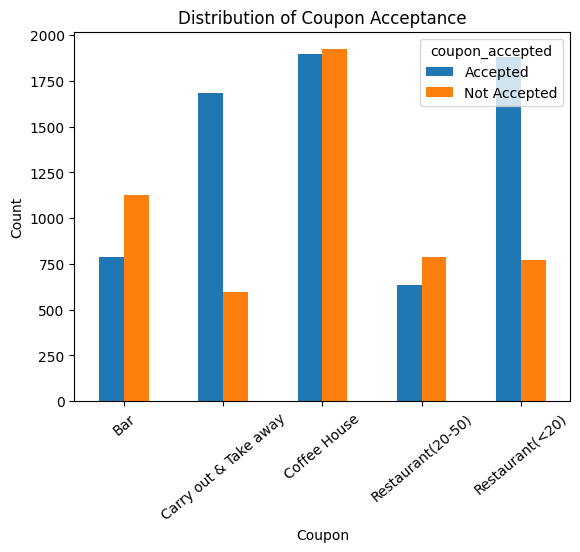

In [14]:
  
##  Bar plot to visualize the distribution of  coupon acceptance
# creating custom hue labels
custom_labels = {"1": "Accepted", "0": "Not Accepted"}
hue_labels = data['coupon_accepted'].astype(str).map(custom_labels)

# Count the occurrences of each coupon grouped by acceptance status
counts = data.groupby(['coupon', hue_labels]).size().unstack()

# Plotting the bar plot
counts.plot(kind='bar', stacked=False)

plt.title('Distribution of Coupon Acceptance')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.xticks(rotation= 40)

# Show the plot
plt.show()

***Notes:*** Bar plot to visualize the distribution of coupon acceptance, and it help you to understand differnciate the number of Coupons accepted vs not            accepted in each category  


6. Use a histogram to visualize the temperature column.

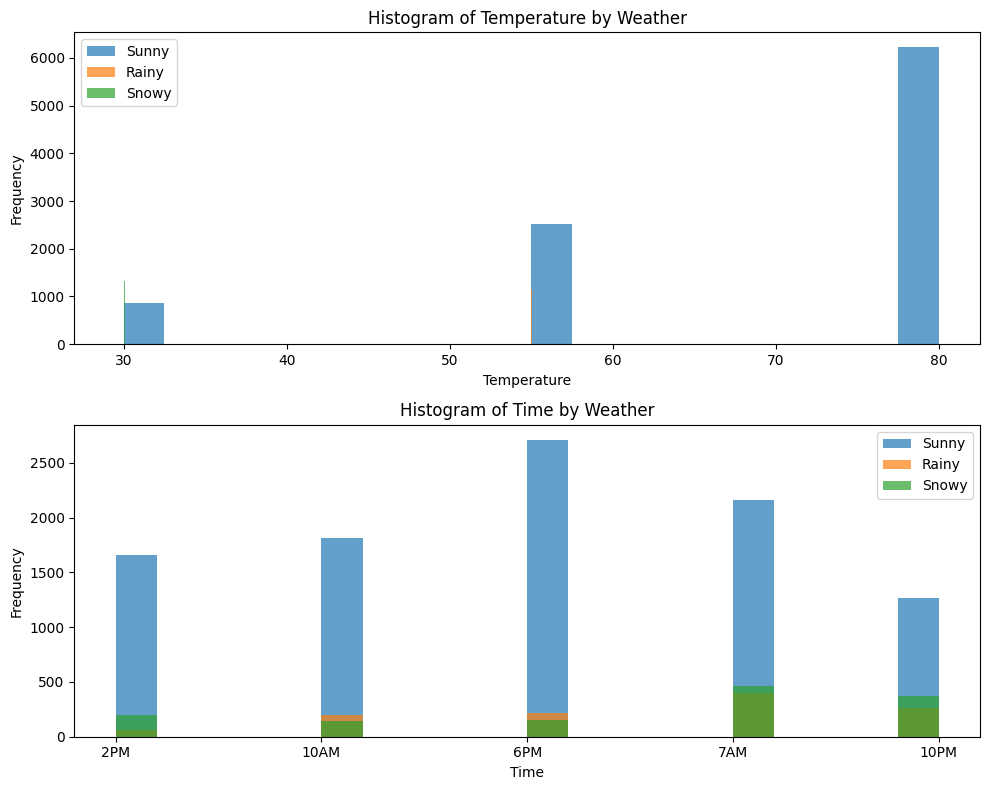

   Temperature (°F)  Count
0                80   6222
1                55   3662
2                30   2195


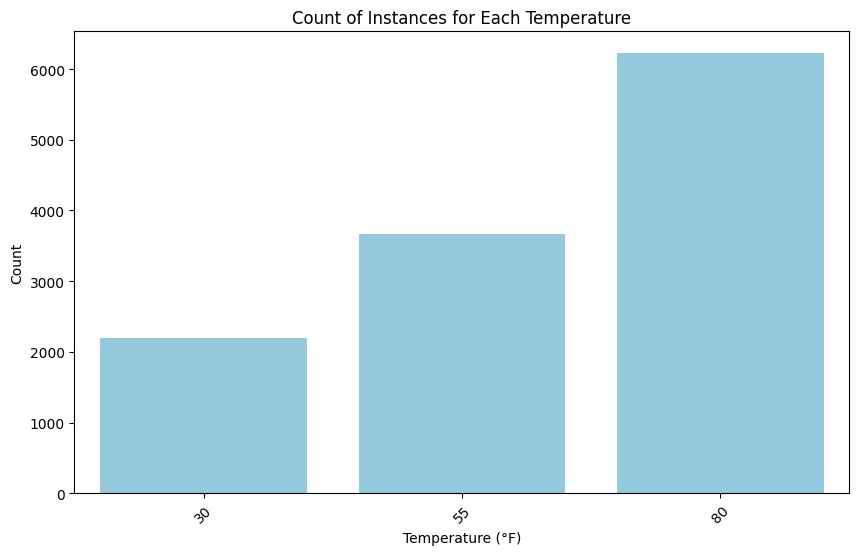

In [15]:
## Extracting weather data
weather_data = data [['weather','temperature','time' ]]
#weather_data
# Create subplots for temperature and time
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot histograms for temperature under different weather conditions
for weather_condition in weather_data['weather'].unique():
    temperature_subset = weather_data[weather_data['weather'] == weather_condition]['temperature']
    axs[0].hist(temperature_subset, bins=20, alpha=0.7, label=weather_condition)

axs[0].set_title('Histogram of Temperature by Weather')
axs[0].set_xlabel('Temperature')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Plot histograms for time under different weather conditions
for weather_condition in weather_data['weather'].unique():
    time_subset = weather_data[weather_data['weather'] == weather_condition]['time']
    axs[1].hist(time_subset, bins=20, alpha=0.7, label=weather_condition)

axs[1].set_title('Histogram of Time by Weather')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Frequency')
axs[1].legend()

plt.tight_layout()
plt.show()


# Count the number of instances of each temperature
temperature_counts = data['temperature'].value_counts().reset_index()
# Rename the columns
temperature_counts.columns = ['Temperature (°F)', 'Count']
#temperature_counts Count the number of instances of each temperature
temperature_counts = data['temperature'].value_counts().reset_index()

# Rename the columns
temperature_counts.columns = ['Temperature (°F)', 'Count']
print (temperature_counts)

# Plot the bar plot to visualize the count of instances for each temperature
plt.figure(figsize=(10, 6))
sns.barplot(data=temperature_counts, x='Temperature (°F)', y='Count', color='skyblue')
plt.title('Count of Instances for Each Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()




***Notes:*** Above subplots and plots created using matplotlib and seaborn plotting libraries to visualize the temperature column


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [16]:
## creating DataFrame with bar coupons related data using "query" function
bar_coupons = data.query("coupon == 'Bar'")
## Verify sample data
bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon_accepted
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


In [17]:
## Unique values and their counts in the "Bar" column:
bar_unique = bar_coupons['Bar'].unique()
bar_counts= bar_coupons ['Bar'].value_counts()

bar_unique,bar_counts

(array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object),
 Bar
 never    788
 less1    553
 1~3      379
 4~8      147
 gt8       46
 Name: count, dtype: int64)

In [18]:
### DO NOT USE THIS CODE - initially tried to lable the string values with categorical lables, but it doesn't add any value as we not plotting these variables
# # Define the mapping dictionary for string values to categorical labels
# mapping = {'never':'never','less1': 'less than 1', '1~3': '1 to 3', '4~8': '4 to 8', 'gt8': 'more than 8'}

# # Map string values to categorical labels in the 'Bar' column using .loc
# bar_coupons.loc[:, 'Bar'] = bar_coupons['Bar'].map(mapping)

# # Print the DataFrame after replacing
# print("After Replacing:\n", bar_coupons.head())


In [19]:
### DO NOT USE THIS CODE -
## Check values after replacing the labels of the values in the "Bar" column:
# bar_unique = bar_coupons['Bar'].unique()
# bar_counts= bar_coupons ['Bar'].value_counts()
# bar_unique,bar_counts

***Notes:*** Filtered the data from main dataframe using query function and created a new dataframe for bar coupons category


2. What proportion of bar coupons were accepted?


In [30]:
## Calculating the proporation of the bar coupons were accepted
prop_accepted = sum(map(lambda x: x == 1, bar_coupons['coupon_accepted']))/len(bar_coupons['coupon_accepted'])
print("Proportion of the bar coupons accepted:",prop_accepted)

Proportion of the bar coupons accepted: 0.41191845269210664


***Findings:***
The proportion of the car coupons acceptance rate is slightly lower suggests that more bar coupons were rejected than accepted. 
In other words, the acceptance rate for car coupons is lower compared to the acceptance rate for bar coupons.
To improve the acceptance rate of car coupons, further analysis might be needed to understand the drivers' preferences, adjust the marketing             strategy, or offer more enticing incentives.


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [21]:
# Calculate acceptance rate for those who went to a bar 3 or fewer times a month
# Filtering the data based on conditions and grouping by 'coupon_accepted' and counting occurrences
Three_or_fewer_grouped = bar_coupons.query("Bar == '1~3'").groupby('coupon_accepted').size()
# calculate acceptance rate
Three_or_fewer_acceptance_rate = Three_or_fewer_grouped.get(1, 0) / Three_or_fewer_grouped.sum()

# Calculate acceptance rate for those who went to bar more than 3 times a month
# Filtering the data based on conditions and grouping by 'coupon_accepted' and counting occurrences
more_than_three_grouped = bar_coupons.query('Bar in ["4~8","gt8"]').groupby('coupon_accepted').size()
# calculate acceptance rate
more_than_three_acceptance_rate = more_than_three_grouped.get(1,0) / more_than_three_grouped.sum()

# Print the acceptance rates for comparison
print( Three_or_fewer_grouped)
print("Acceptance rate for those who went to a bar 3 or fewer times a month:", Three_or_fewer_acceptance_rate)
#print("Acceptance rate for those who went to a bar more than 3 times a month:",Three_or_fewer_acceptance_rate)
print(more_than_three_grouped)
print("Acceptance rate for those who went to a bar more than 3 times a month:", more_than_three_acceptance_rate)

coupon_accepted
0    134
1    245
dtype: int64
Acceptance rate for those who went to a bar 3 or fewer times a month: 0.6464379947229552
coupon_accepted
0     46
1    147
dtype: int64
Acceptance rate for those who went to a bar more than 3 times a month: 0.7616580310880829


***Findings:***
It's evident that there is a notable difference in the acceptance rates of bar coupons based on the frequency of bar visits.
For individuals who went to a bar 3 or fewer times a month, the acceptance rate is 0.6464379947229552.
For those who went to a bar more than 3 times a month, the acceptance rate is 0.7616580310880829
The data indicates that individuals who visit bars more frequently, exceeding 3 times a month, are significantly more likely to accept bar coupons       compared to those who visit bars less frequently.
This suggests that there might be a correlation between the frequency of bar visits and the propensity to accept promotional offers like bar             coupons
In conclusion, the findings suggest that targeting individuals who visit bars more frequently with bar coupons might be a more effective strategy        for increasing redemption rates compared to targeting those who visit bars less often.
**Notes***
values 'never'and 'less1' considered as those who never went to a bar, and excluded from this specific usecase analysis


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [22]:
## verify unique values and and corresponding counts in the "age" column:

age_unique = bar_coupons['age'].unique()
age_counts= bar_coupons ['age'].value_counts()

# print individual values and counts in the "age" column
print (age_unique)
print (age_counts)

# Case#1: Calculating acceptance rate for the drivers who go to a bar more than once a month and are over the age of 25

# create lists
bar_list =  ["1~3","4~8","gt8"]
age_over25_list = ["46", "26", "31", "41", "50plus", "36"]
# Filtering the data based on conditions and grouping by 'coupon_accepted' and counting occurrences
More_than_once_over_age_25 = bar_coupons.query("Bar in @bar_list and age in @age_over25_list").groupby('coupon_accepted').size()
# Case#1: Calculate acceptance rate 
More_than_once_over_age_25_acceptance_rate =  More_than_once_over_age_25.get(1,0) / More_than_once_over_age_25.sum()

# Case#2: Calculating acceptance rate for the drivers who go to a bar more than once a month and all the age categories other than over the age of 25
# create lists
age_all_other_list = ["21", "below21"]
# Filtering the data based on conditions and grouping by 'coupon_accepted' and counting occurrences
More_than_once_over_age_others = bar_coupons.query("Bar in @bar_list and age in @age_all_other_list").groupby('coupon_accepted').size()
# Case#2: Calculate acceptance rate 
More_than_once_over_age_others_acceptance_rate = More_than_once_over_age_others.get(1,0) /  More_than_once_over_age_others.sum()


# Print the acceptance rates for comparison
print ("Case#1: Coupon Acceptance counts:" ,More_than_once_over_age_25)
print ("Case#2: Coupon Acceptance counts:", More_than_once_over_age_others)
print ("Case#1: Acceptance rate for the drivers who go to a bar more than once a month and are over the age of 25:"
        , More_than_once_over_age_25_acceptance_rate)
print ("Case#2: acceptance rate for the drivers who go to a bar more than once a month and all the age categories other than over the age of 25:" 
       , More_than_once_over_age_others_acceptance_rate)



['21' '46' '26' '31' '41' '50plus' '36' 'below21']
age
21         397
26         368
31         324
50plus     273
36         196
41         171
46         103
below21     81
Name: count, dtype: int64
Case#1: Coupon Acceptance counts: coupon_accepted
0    125
1    278
dtype: int64
Case#2: Coupon Acceptance counts: coupon_accepted
0     55
1    114
dtype: int64
Case#1: Acceptance rate for the drivers who go to a bar more than once a month and are over the age of 25: 0.6898263027295285
Case#2: acceptance rate for the drivers who go to a bar more than once a month and all the age categories other than over the age of 25: 0.6745562130177515


***Findings:*** 
It appears that there is a slight difference in the acceptance rate of bar coupons between drivers who go to a bar more than once a month and            are over the age of 25 compared to drivers who fall into other age categories, including those under the age of 25.
Specificall:

The acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 is 0.68982630272.
T.
The acceptance rate for drivers who go to a bar more than once a month and are in all age categories other than over 
the age      0.67455621301775
5.
From these numbers, we can see that the acceptance rate is slightly higher for drivers who are over the age of 25. This suggests      older drivers, who may have more established preferences or habits, are marginally more likely to accept bar coupons compared to youngev   -
rs.

However, the difference in acceptance rates is relatively small, indicating that age alone might not be a significant factor        rmining whether a driver accepts bar coupons. Other variables or factors may also play a role in influencing acceptance rates.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [23]:
## Identify Unique values in the "passanger" and "occupation" columns:
passanger_unique = bar_coupons['passanger'].unique()
occupation_unique = bar_coupons['occupation'].unique()
# Check the unqiue values
print (passanger_unique)
print (occupation_unique)

## Creating lists to filter the data
passanger_list = ["Friend(s)", "Alone", "Partner"]
occupations_list = [value for value in bar_coupons['occupation'] if value !=  'Farming Fishing & Forestry' ]
occupations_list = list(set(occupations_list))
# print (occupations_list)

## Filtering the data based on conditions Grouping by 'coupon_accepted' and counting occurrences
filtered_data = bar_coupons.query("Bar in @bar_list and passanger in @passanger_list and occupation in @occupations_list ").groupby('coupon_accepted').size()
print (filtered_data)
## Calculate Acceptance rate
acceptance_rate = filtered_data.get(1,0) / filtered_data.sum()

## Print acceptance rate
print ("Acceptance rate:",acceptance_rate)

['Friend(s)' 'Alone' 'Kid(s)' 'Partner']
['Architecture & Engineering' 'Student' 'Education&Training&Library'
 'Unemployed' 'Healthcare Support' 'Healthcare Practitioners & Technical'
 'Sales & Related' 'Management' 'Arts Design Entertainment Sports & Media'
 'Computer & Mathematical' 'Life Physical Social Science'
 'Personal Care & Service' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Community & Social Services' 'Installation Maintenance & Repair'
 'Transportation & Material Moving' 'Business & Financial'
 'Protective Service' 'Food Preparation & Serving Related'
 'Production Occupations' 'Building & Grounds Cleaning & Maintenance'
 'Farming Fishing & Forestry']
coupon_accepted
0    154
1    376
dtype: int64
Acceptance rate: 0.7094339622641509


***Findings:*** 
compared the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had                        occupations other than farming, fishing, or forestry.
It appears that the acceptance rate for bar coupons is higher among drivers who go to bars more frequently, have adult passengers, and have              occupations other than farming, fishing, or forestry. 
This suggests that drivers who visit bars more frequently, especially with adult passengers and occupations that are not in the "Farming,                Fishing & Forestry" sector, tend to have a higher likelihood of accepting bar coupons.
This finding could indicate that these drivers, who may have higher-paying occupations and socialize more frequently in bar settings, a e more receptive to promotional offers such as bar coupons. It aligns with the notion that individuals with higher disposable incomes and mo e varied social activities might be more inclined to take advantage of discounts or promotional deals.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [24]:
## Case#1: Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed 
## Identify Unique values in the "maritalStatus" column:
marital_status_unique = bar_coupons['maritalStatus'].unique()
#print (marital_status_unique)

##  create a dataframe with the (maritalStatus) filtered the data 
filtered_data = bar_coupons[bar_coupons['maritalStatus'] != 'Widowed']
# Create a list of marital statuses from the filtered DataFrame
marital_status_list = filtered_data['maritalStatus'].tolist()
# creating a unique list
marital_status_list = list(set(marital_status_list)) 
#print (marital_status_list)

## Case#1: Filtering the data based on conditions Grouping by 'coupon_accepted' and counting occurrences
filtered_data_case1 = bar_coupons.query("Bar in @bar_list and passanger in @passanger_list and maritalStatus in @marital_status_list ").groupby('coupon_accepted').size()
print ( "Filtered data for Case#1:",filtered_data_case1)

## Calculate Acceptance rate for Case#1
acceeptance_rate_case1 = filtered_data_case1.get(1,0) / filtered_data_case1.sum()

## Case#2: Acceptance rate for drivers who go to bars more than once a month and are under the age of 30
# create a list for under the age of 30
age_under30_list = ["below21", "21", "26"]

## Case#2: Filtering the data based on conditions Grouping by 'coupon_accepted' and counting occurrences
filtered_data_case2 = bar_coupons.query("Bar in @bar_list and age in @age_under30_list").groupby('coupon_accepted').size()
print(filtered_data_case2)

## Calculate Acceptance rate for Case#2
acceptance_rate_case2 = filtered_data_case2.get(1,0) / filtered_data_case2.sum()

## Case#3: Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K
# Createing dataframe with cheap resturants coupons specific attributes
restaurant_coupons = data.query ("coupon == 'Restaurant(<20)'")
#print (type(restaurant_coupons))
#print (restaurant_coupons.head())
#print (restaurant_coupons.columns)

## Identify unique values in the columns "RestaurantLessThan20" (cheap restaurants)  and  "income" :
RestaurantLessThan20_unique =  restaurant_coupons['RestaurantLessThan20'].unique()
income_unique = restaurant_coupons['income'].unique()
print (RestaurantLessThan20_unique)
print (income_unique)

## creating lists to filter the data
restaurants_morethan4_list = ["4~8", "gt8"]
income_lessthan50k_list = ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]

## Case#3: Filtering the data based on conditions, Grouping by 'coupon_accepted' and counting occurrences
filtered_data_case3 = restaurant_coupons.query ('RestaurantLessThan20 in @restaurants_morethan4_list and income in @income_lessthan50k_list').groupby('coupon_accepted').size()
print (filtered_data_case3)
## Calculate acceptance rate for Case#3
acceptance_rate_case3 = filtered_data_case3.get(1,0) / filtered_data_case3.sum()

## Print Acceptance rates for comparison
print ("Case#1: Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed:"
       ,acceeptance_rate_case1)
print ("Case#2: Acceptance rate for drivers who go to bars more than once a month and are under the age of 30:"
       ,acceptance_rate_case2) 
print ("Case#: Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K:"
       ,acceptance_rate_case3 )

Filtered data for Case#1: coupon_accepted
0    154
1    376
dtype: int64
coupon_accepted
0     92
1    236
dtype: int64
['4~8' '1~3' 'less1' 'gt8' 'never']
['$62500 - $74999' '$12500 - $24999' '$75000 - $87499' '$50000 - $62499'
 '$37500 - $49999' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
coupon_accepted
0    141
1    350
dtype: int64
Case#1: Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 0.7094339622641509
Case#2: Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: 0.7195121951219512
Case#: Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 0.7128309572301426


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

***Observations:***
Based on the observations,It seems that drivers who go to bars more than once a month tend to have higher acceptance rates for coupons                 compared to other demographic.

Additionally, drivers who frequent cheap restaurants more than four times a month and have incomes less than $50K also show a relatively hi h acceptance rat.
C
Considering these patrns s, we can hypothesize that drivers who accept bar coupons may be individuals who are relatively y  ng (possibly under 3 ), have a moderate inmo e, and are more likely to frequentar  . 
They might also be individuals who are more inclined to accept promotional offers or discounts in ergenal. 
However, it's essential to conduct further analysis and possibly gather more data to validate this hypothesis coniclusvely.

***Conclusion***
Based on the findings and observations from the analysis of bar coupon acceptance, below are some of key insights:
1.	Overall Acceptance Rate: The proportion of drivers accepting bar coupons is higher than the proportion rejecting them, indicating the effectiveness of the coupon distribution strategy or the attractiveness of the offers themselves.
2.	Comparison with Other Coupons: Bar coupons have a slightly lower acceptance rate compared to other types of coupons. This suggests a need for further analysis to understand drivers' preferences and adjust marketing strategies accordingly.
3.	Frequency of Bar Visits: There is a significant correlation between the frequency of bar visits and the likelihood of accepting bar coupons. Drivers who visit bars more frequently are more likely to accept coupons, indicating that targeting this demographic could be an effective strategy.
4.	Age and Acceptance Rates: While older drivers show a slightly higher acceptance rate for bar coupons, the difference is relatively small. This suggests that age alone may not be a significant factor in acceptance rates, and other variables likely play a role.
5.	Occupation and Passenger Type: Drivers who visit bars more frequently, have adult passengers, and are not in specific occupational sectors tend to have higher acceptance rates. This could indicate that drivers with higher disposable incomes and more varied social activities are more receptive to promotional offers.
6.	Demographic Patterns: Drivers who go to bars frequently, as well as those who frequent cheap restaurants and have lower incomes, show higher acceptance rates. This suggests that individuals who are younger, have moderate incomes, and frequent bars may be more inclined to accept co
upons.
In conclusion, targeting drivers who visit bars frequently, especially those with certain demographic characteristics, could lead to higher redemption rates for bar coupons. However, further analysis and data validation are necessary to solidify these findings and optimize marketing strategies effectively.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [25]:
## extract Coffee House couponts data
coffeehouse_coupons = data.query("coupon == 'Coffee House'")
coffeehouse_coupons.head()  

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon_accepted
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


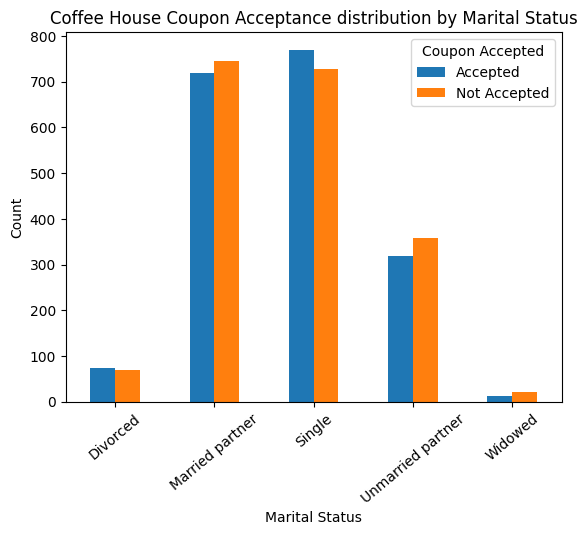

In [26]:
## Plotted Histogram using seaborn, visualization of Coffee House coupon acceptance distribution by marital status
# Custom hue labels
custom_labels = {"1": "Accepted", "0": "Not Accepted"}
hue_labels = coffeehouse_coupons['coupon_accepted'].astype(str).map(custom_labels)

# Count occurrences of each marital status grouped by coupon acceptance
counts = coffeehouse_coupons.groupby(['maritalStatus', hue_labels]).size().unstack()

# Plot the bar plot
counts.plot(kind='bar', stacked= False)

plt.title('Coffee House Coupon Acceptance distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=40)

# Show the plot
plt.legend(title='Coupon Accepted')
plt.show()

***Notes:*** 
Plotted Histogram using seaborn to visualise the Coffee House coupon acceptance distribution by marital status
These acceptance rates provide insights into how different marital status categories may influence the likelihood of accepting coffee house coupons

In [27]:

# Calculate Coffee House coupon acceptance rate for each marital status category
acceptance_rates_by_maritalstatus = coffeehouse_coupons.groupby('maritalStatus')['coupon_accepted'].mean().reset_index()
print ("Acceptance rate of coffee house coupons by passenger's marital status:", acceptance_rates_by_maritalstatus)


Acceptance rate of coffee house coupons by passenger's marital status:        maritalStatus  coupon_accepted
0           Divorced         0.517483
1    Married partner         0.491132
2             Single         0.514362
3  Unmarried partner         0.470414
4            Widowed         0.352941


***Findings:*** 
These acceptance rates provide insights into how different marital status categories may influence the likelihood of accepting coffee                house coupons.
Divorced individuals seem to have the highest acceptance rate, suggesting that they may be more receptive to coffee house offers.Married partners have a slightly lower acceptance rate, indicating that their preferences or behaviors regarding coffee house coupons might              differ from divorced individual. 
Single individuals also show a relatively high acceptance rate, comparable to divorced individuls.

Unmarried partners have a lower acceptance rate compared to other categories, suggesting that their decision-making regarding coffee h  se coupons might be influenced by factors unique to their situia- n.
Widowed individuals have the lowest acceptance rate, indicating that they may be less inclined to accept coffee house coupons compa    to other marital status categories.
These findings can be valuable for businesses and marketers looking to target specific demographic groups with coffee house promotions and offers.


In [28]:
# Calculate Coffee House coupon acceptance rate by income range
acceptance_rates_by_income = coffeehouse_coupons.groupby('income')['coupon_accepted'].mean().reset_index()
print ("Acceptance rate of coffee house coupons by passenger's income:", acceptance_rates_by_income)

Acceptance rate of coffee house coupons by passenger's income:              income  coupon_accepted
0   $100000 or More         0.489524
1   $12500 - $24999         0.552212
2   $25000 - $37499         0.465154
3   $37500 - $49999         0.547406
4   $50000 - $62499         0.498047
5   $62500 - $74999         0.435424
6   $75000 - $87499         0.298246
7   $87500 - $99999         0.539419
8  Less than $12500         0.540268


**Findings:** 
The acceptance rates of coffee house coupons vary across different income categories, suggesting that passenger income levels influence                  the likelihood of accepting these coupons, Key findings includes:
***Income Range Influence:*** 
There is a noticeable fluctuation in acceptance rates across income categories. For instance, the acceptance rate is highest for passengers              with incomes ranging from $12,500 to $24,999 (55.22%) and lowest for those earning between $75,000 and $87,499 (29.82%)
***Middle Income Acceptance:*** 
Passengers with incomes between $25,000 and $49,999 generally demonstrate moderate to high acceptance rates, with rates ranging from 46.52% to           54.74%.This suggests that individuals in middle-income brackets are more receptive to coffee house coupons
***Higher Income Consideration:*** 
Interestingly, acceptance rates for passengers earning $100,000 or more and those earning less than $12,500 are below 50%. 
This could indicate that higher-income passengers may have different preferences or behaviors regarding coffee house coupons compared to those           with lower incomes.
Overall, understanding the relationship between passenger income and coupon acceptance rates can help businesses optimize their marketing efforts and effectively target their desired customer segments.

In [29]:
## Compare Acceptance rate of coffee house coupons by passenger education leve and who goes to a coffee house more that 4 times :

## Identify unique values in the CoffeeHose attribute/column
coffeehouse_unique = coffeehouse_coupons['CoffeeHouse'].unique()
print (coffeehouse_unique)
## creat lists to filter the data
coffeehouse_morethan4_list = ["4~8", "gt8"]

## Calculate Coffee House coupon acceptance rate by education level and who go to coffee house more than 4 times

acceptance_rates_by_edu = coffeehouse_coupons.query('CoffeeHouse in @coffeehouse_morethan4_list').groupby('education')['coupon_accepted'].mean().reset_index()
print ("Acceptance rate of coffee house coupons who go to coffee house more than 4 times and education level:"
       , acceptance_rates_by_edu)




['less1' '4~8' '1~3' 'gt8' 'never']
Acceptance rate of coffee house coupons who go to coffee house more than 4 times and education level:                                 education  coupon_accepted
0                       Associates degree         0.578947
1                        Bachelors degree         0.688172
2  Graduate degree (Masters or Doctorate)         0.632035
3                    High School Graduate         0.611111
4                        Some High School         0.333333
5                Some college - no degree         0.725410


***Findings:*** 
The acceptance rates of coffee house coupons among passengers who visit coffee houses more than 4 times per month vary significantly                     based on their education level. Here are the key findings:
***Higher Education, Higher Acceptance:***
Passengers with higher levels of education tend to have higher acceptance rates for coffee house coupons. For instance, individuals with                a Bachelors degree or higher (68.82%) and those with a Graduate degree (Masters or Doctorate) (63.20%) exhibit notably higher acceptance                 rates compared to those with lower levels of education
***Associates Degree:*** 
While slightly lower than those with Bachelors or Graduate degrees, individuals with an Associates degree still demonstrate a relatively                high acceptance rate (57.89%).
***High School Graduates and Some College:***
High School Graduates and individuals with some college experience but no degree also show moderate acceptance rates (61.11% and 72.54%                  respectively),
***Lowest Acceptance among Some High School:*** 
Interestingly, individuals with only some high school education exhibit the lowest acceptance rate (33.33%), indicating a potential                      correlation between higher education attainment and receptiveness to coffee house coupons.
These findings suggest that higher levels of education may be associated with a greater propensity to accept coffee house coupons, possibly reflecting differences in spending habits, lifestyle preferences, or perceptions of value among different educational groups. Businesses can leverage these insights to tailor their marketing strategies and target specific educational demographics more effectively.


***Conclusion**
The analysis reveals that acceptance rates for coffee house coupons vary significantly based on demographic factors such as marital status, income, and education level. These findings provide valuable insights for businesses seeking to target specific customer segments with coffee house promotions.
